# Semantic Analysis Word2Vec

In [ ]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive')

!gdown https://drive.google.com/uc?id=1BpTkrFqGH4BoDBTcR3tmm9ZZuj6FjlLB
!gdown https://drive.google.com/uc?id=1puCMovgqC32m9AAshbASzGHDEgKvWEvM
!gdown https://drive.google.com/uc?id=1NtebE9VUzA4MvA56EuBSN-OVl7CODHo1

# extract data and source code (src)
!unzip /content/src.zip -d /content/
!unzip /content/data.zip -d /content/

# create env and install package
!pip3 install virtualenv
!virtualenv /content/disertasi
!source /content/disertasi; pip install --upgrade pip
!source /content/disertasi; pip install ipykernel
!source /content/disertasi; pip install -r /content/requirements.txt

%cd /content/
%ls

# !pip install networkx
!pip install numpy==1.25.0

Mounted at /content/drive
Downloading...
From: https://drive.google.com/uc?id=1BpTkrFqGH4BoDBTcR3tmm9ZZuj6FjlLB
To: /content/requirements.txt
100% 273/273 [00:00<00:00, 925kB/s]
Downloading...
From: https://drive.google.com/uc?id=1puCMovgqC32m9AAshbASzGHDEgKvWEvM
To: /content/src.zip
100% 18.1k/18.1k [00:00<00:00, 34.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1NtebE9VUzA4MvA56EuBSN-OVl7CODHo1
From (redirected): https://drive.google.com/uc?id=1NtebE9VUzA4MvA56EuBSN-OVl7CODHo1&confirm=t&uuid=8cbdfecb-1360-401e-8ac4-f8b3e09ada24
To: /content/data.zip
100% 76.5M/76.5M [00:01<00:00, 43.1MB/s]
Archive:  /content/src.zip
 extracting: /content/src/__init__.py  
   creating: /content/src/__pycache__/
  inflating: /content/src/__pycache__/__init__.cpython-37.pyc  
  inflating: /content/src/__pycache__/static_method.cpython-37.pyc  
  inflating: /content/src/__pycache__/topic_detection.cpython-37.pyc  
  inflating: /content/src/__pycache__/topic_semantic.cpython-37.pyc 

## Stop here and restart your session

In [ ]:
# import Library
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from jcopml.utils import save_model, load_model
from string import punctuation

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec, FastText
import gensim
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from src.topic_semantic import TopicSemanticEvolvingDynamic, rename_columns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Load Data

In [ ]:
df_cluster_w2v = pd.read_csv('/content/data/hasil_cluster_w2v_menggunakan_stopwords.csv')
df_centroid_w2v = pd.read_csv('/content/data/centroid_w2v_menggunakan_stopwords.csv')
df_topic_prob = pd.read_excel('/content/data/topic_prob.xlsx', engine='openpyxl')
df_topic_word = pd.read_excel('/content/data/topic_word.xlsx', engine='openpyxl')
df_intensity = pd.read_excel('/content/data/intensity_by_year.xlsx', engine='openpyxl')
df_top_words = pd.read_excel('/content/data/top_words_each_topic.xlsx', engine='openpyxl')

df_topic_word.rename({'Unnamed: 0':'topic'}, axis=1, inplace=True)
df_topic_prob.rename({'Unnamed: 0':'topic'}, axis=1, inplace=True)

In [ ]:
df_cluster_w2v.head()

word          0          1  cluster
0   student  50.072628  34.392887       64
1    system -47.917380 -30.142546       42
2  analysis -21.493973 -66.943450       33
3     model -50.205334 -30.929787       42
4     value -37.034855 -34.075370        1

In [ ]:
df_topic_word.head(10)

Output hidden; open in https://colab.research.google.com to view.

# Topic Semantic Evolving Dynamic

In [ ]:
model_TSED = TopicSemanticEvolvingDynamic(df_cluster_w2v, df_intensity, df_topic_word, df_topic_prob,
                                         year_columns='year',
                                         cluster_columns='cluster',
                                         topic_year_columns=['topic','year'],
                                         word_columns='word',
                                         start_extract_columns=2)

In [ ]:
df_topic_semantic_w2v = model_TSED.create_topic_semantic_dataframe()

In [ ]:
df_topic_semantic_w2v.head(10)

topic  year   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  \
0      1  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1      2  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2      3  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3      4  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4      5  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5      6  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6      7  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7      8  2023 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8      1  2022 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9      2  2022 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
5 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
6 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
7 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
8 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
9 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  \
0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
2 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
3 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
4 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N

In [ ]:
df_topic_semantic_w2v.shape

(120, 178)

In [ ]:
df_topic_semantic_prob_w2v, df_topic_semantic_word_w2v = model_TSED.topic_semantic_prob_distribution(df_topic_semantic_w2v)

Training time: 229.7999713420868s


In [ ]:
df_topic_semantic_prob_w2v.head(10)

topic  year         0         1         2         3         4         5  \
0      1  2023  0.002831  0.020273  0.019127  0.016640  0.070881  0.001337   
1      2  2023  0.000364  0.027824  0.001315  0.001512  0.021707  0.001927   
2      3  2023  0.007570  0.014848  0.005204  0.012601  0.054505  0.004109   
3      4  2023  0.001967  0.011365  0.002961  0.001625  0.033400  0.001414   
4      5  2023  0.000433  0.050519  0.002393  0.008273  0.025397  0.001185   
5      6  2023  0.007246  0.023405  0.013609  0.016973  0.015147  0.001232   
6      7  2023  0.006595  0.021212  0.004946  0.020301  0.070266  0.015755   
7      8  2023  0.013033  0.017870  0.003156  0.007215  0.015771  0.000325   
8      1  2022  0.000734  0.058411  0.001744  0.006196  0.028322  0.001019   
9      2  2022  0.004738  0.004478  0.007391  0.018235  0.062502  0.015693   

          6         7         8         9        10        11        12  \
0  0.000035  0.000044  0.034782  0.029734  0.000026  0.015270  0.025270   
1  0.000044  0.002948  0.048642  0.011322  0.002863  0.002620  0.011740   
2  0.004917  0.000284  0.025696  0.019235  0.001695  0.010825  0.024009   
3  0.008462  0.000296  0.039628  0.022537  0.010353  0.011089  0.018518   
4  0.000034  0.000472  0.037184  0.015074  0.000893  0.005420  0.010220   
5  0.000061  0.000181  0.042193  0.009618  0.000045  0.004505  0.011494   
6  0.000075  0.000094  0.032768  0.017193  0.000056  0.011885  0.011229   
7  0.000153  0.012384  0.044433  0.002859  0.000115  0.001306  0.008776   
8  0.000127  0.000263  0.036458  0.012580  0.000096  0.009777  0.012554   
9  0.000060  0.000161  0.011248  0.014705  0.000042  0.017318  0.009223   

         13        14        15        16        17        18        19  \
0  0.007792  0.054734  0.002038  0.001756  0.000494  0.003866  0.000996   
1  0.002488  0.033823  0.000905  0.000171  0.000193  0.007093  0.009031   
2  0.006116  0.033162  0.001256  0.009216  0.008393  0.003705  0.000494   
3  0.008047  0.021709  0.000433  0.028337  0.001469  0.004068  0.004149   
4  0.002444  0.042012  0.038017  0.003234  0.002251  0.004976  0.000835   
5  0.045079  0.032863  0.001142  0.035247  0.002892  0.003070  0.000151   
6  0.031337  0.063290  0.000370  0.014699  0.012748  0.008018  0.001404   
7  0.000690  0.013355  0.002705  0.001471  0.001562  0.032613  0.010928   
8  0.001143  0.035483  0.032310  0.000995  0.001510  0.002794  0.002333   
9  0.023035  0.038853  0.000488  0.018765  0.018734  0.000320  0.000056   

         20        21        22        23        24        25        26  \
0  0.001020  0.006152  0.000555  0.000013  0.007120  0.017643  0.000414   
1  0.001170  0.003825  0.002978  0.000076  0.002716  0.000936  0.002674   
2  0.006160  0.019275  0.014526  0.014073  0.006931  0.000867  0.000534   
3  0.004359  0.001412  0.000412  0.000275  0.000296  0.001033  0.001605   
4  0.000613  0.002268  0.003286  0.000013  0.002279  0.004873  0.005277   
5  0.000635  0.000166  0.000098  0.000558  0.005688  0.000242  0.005311   
6  0.003006  0.010680  0.000561  0.002550  0.017803  0.000301  0.006534   
7  0.002160  0.003429  0.000647  0.000057  0.002894  0.001098  0.003277   
8  0.001442  0.006181  0.001378  0.000042  0.000754  0.019746  0.003118   
9  0.000919  0.005952  0.000060  0.000419  0.007408  0.001303  0.000421   

         27        28        29        30        31        32        33  \
0  0.003890  0.000333  0.002628  0.000563  0.001805  0.000090  0.050812   
1  0.000367  0.007969  0.078082  0.000662  0.003700  0.000625  0.049109   
2  0.004034  0.000077  0.003299  0.003540  0.000455  0.000043  0.039645   
3  0.009306  0.001509  0.007286  0.021685  0.005423  0.001970  0.063660   
4  0.002295  0.000478  0.008570  0.001708  0.004332  0.001146  0.088713   
5  0.009248  0.000068  0.001678  0.005801  0.000967  0.000677  0.071823   
6  0.004132  0.000085  0.001683  0.001664  0.000104  0.000374  0.041420   
7  0.000967  0.002025  0.005101  0.000618  0.009624  0.000096  0.0

In [ ]:
df_topic_semantic_word_w2v.head(10)

topic  year                                                  0  \
0      1  2023  importance together upon expressed hold doing ...   
1      2  2023  together necessity agree burden importance exp...   
2      3  2023  activity strongly importance famous meaningful...   
3      4  2023  activity burden careful strongly expressed mea...   
4      5  2023  together burden meaningful careful agree agree...   
5      6  2023  activity declared expectation agree importance...   
6      7  2023  activity atmosphere agreed skilled agree neces...   
7      8  2023  activity expressed agree together atmosphere n...   
8      1  2022  happiness equally strongly accomplishment ambi...   
9      2  2022  activity importance strongly closely qualifica...   

                                                   1  \
0  our term efficiency performance furthermore fi...   
1  performance efficiency value capacity reliabil...   
2  value mean percentage capacity actual guarante...   
3  mean average value score percentage furthermor...   
4  accuracy performance value term precision our ...   
5  value score average percentage performance our...   
6  performance value flexibility term capability ...   
7  value performance corresponding confidence efi...   
8  accuracy performance our value term average me...   
9  term mean finally moreover additionally flexib...   

                                                   2  \
0  information digital online check google store ...   
1  profile digital report smartphone record verif...   
2  library information report keywords whatsapp r...   
3  record profile report offline digital library ...   
4  information offline verification recording rec...   
5  online information google statement report lib...   
6  profile phone packaging report recording digit...   
7  inventory digital packaging report check profi...   
8  forensic digital forensics check geospatial ne...   
9  library recording digital verification profile...   

                                                   3  \
0  service process planning plan program guidelin...   
1  program process coordination completing superv...   
2  program service procedure process training soc...   
3  administration procedure preparation prospecti...   
4  process training procedure assignment planning...   
5  service process program guidance readiness pla...   
6  process team training preparation planning pro...   
7  process coordination preparation completing pr...   
8  process training planning preparatory hereinaf...   
9  program process assistance planning procedure ...   

                                                   4  \
0  many however various need become because but s...   
1  various however because especially where withi...   
2  because especially but need still related even...   
3  however those many some global world but still...   
4  various several many where some because howeve...   
5  need should regarding must becomes tend increa...   
6  various special where still several need must ...   
7  various made several specific however commonly...   
8  however several many various where recently sp...   
9  related various because however several especi...   

                                                   5  \
0  paradigm nature fundamental rational thought n...   
1  movement fundamental universal freedom notion ...   
2  practice movement interpreted thought notion u...   
3  movement minority freedom rational belief inte...   
4  movement nature paradigm rational universal th...   
5  conflict fundamental belief interpreted inclus...   
6  inclusive practice nature universal reality be...   
7  interpreted movement nature practice fundament...   
8  fundamental scientist movement undergoes sad m...   
9  practice conflict thought nature reality movem...   

                                                   6  \
0  parity mother birth anxiety pain undergoing to...   
1  parity pain anxiety undergoing birth mother

In [ ]:
columns_name_new = rename_columns(df_topic_semantic_prob_w2v, start_columns=2)

In [ ]:
# rename columns
df_topic_semantic_word_w2v.rename(columns_name_new, axis=1, inplace=True)
df_topic_semantic_prob_w2v.rename(columns_name_new, axis=1, inplace=True)

In [ ]:
df_topic_semantic_word_w2v.to_excel('data/topic_semantic_word_w2v.xlsx', index=False)
df_topic_semantic_prob_w2v.to_excel('data/topic_semantic_prob_w2v.xlsx', index=False)

In [ ]:
df_topic_semantic_prob_w2v_topk, columns_topk_w2v, list_topic_w2v, topic_results_w2v = model_TSED.get_top_cluster(df_topic_semantic_prob_w2v,
                                                                                                                  aggregation_func='sum',
                                                                                                                  topk=10)

In [ ]:
df_topic_semantic_prob_w2v_topk.head(10)

topic  year         1         2         3         4         5         6  \
0      1  2023  0.050812  0.070881  0.034782  0.054734  0.078976  0.008682   
1      2  2023  0.049109  0.021707  0.048642  0.033823  0.075281  0.000248   
2      3  2023  0.039645  0.054505  0.025696  0.033162  0.005084  0.013305   
3      4  2023  0.063660  0.033400  0.039628  0.021709  0.002915  0.037004   
4      5  2023  0.088713  0.025397  0.037184  0.042012  0.091708  0.000547   
5      6  2023  0.071823  0.015147  0.042193  0.032863  0.028116  0.095321   
6      7  2023  0.041420  0.070266  0.032768  0.063290  0.018126  0.017617   
7      8  2023  0.064488  0.015771  0.044433  0.013355  0.006368  0.000861   
8      1  2022  0.081491  0.028322  0.036458  0.035483  0.122550  0.000331   
9      2  2022  0.047106  0.062502  0.011248  0.038853  0.013955  0.043932   

          7         8         9        10  
0  0.005115  0.020273  0.005431  0.027289  
1  0.008705  0.027824  0.006708  0.018353  
2  0.012091  0.014848  0.007663  0.022343  
3  0.033954  0.011365  0.023345  0.012429  
4  0.003326  0.050519  0.003593  0.013382  
5  0.047632  0.023405  0.048962  0.030280  
6  0.009643  0.021212  0.015481  0.021380  
7  0.010672  0.017870  0.004897  0.006441  
8  0.002630  0.058411  0.003685  0.013737  
9  0.004587  0.004478  0.001355  0.012391

In [ ]:
columns_topk_w2v

Index(['topic', 'year', 34, 5, 9, 15, 43, 65, 42, 2, 132, 120], dtype='object')

In [ ]:
list_topic_w2v

array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
topic_results_w2v[0]

topic  year         1         2         3         4         5         6  \
0        1  2023  0.050812  0.070881  0.034782  0.054734  0.078976  0.008682   
8        1  2022  0.081491  0.028322  0.036458  0.035483  0.122550  0.000331   
16       1  2021  0.063708  0.007532  0.015515  0.010690  0.017390  0.007912   
24       1  2020  0.057866  0.018646  0.036113  0.015951  0.005267  0.000965   
32       1  2019  0.064299  0.081946  0.038946  0.059463  0.043326  0.004112   
40       1  2018  0.060427  0.006011  0.049782  0.033812  0.036354  0.133448   
48       1  2017  0.055030  0.019424  0.033760  0.010739  0.012161  0.008775   
56       1  2016  0.045458  0.045098  0.024896  0.046691  0.020593  0.005520   
64       1  2015  0.069202  0.033642  0.031724  0.044344  0.008929  0.006765   
72       1  2014  0.037407  0.053925  0.032354  0.049783  0.015348  0.008137   
80       1  2013  0.061518  0.015560  0.044581  0.030270  0.030341  0.130529   
88       1  2012  0.070144  0.011558  0.020711  0.015109  0.014221  0.005014   
96       1  2011  0.074662  0.019587  0.031455  0.012659  0.001423  0.002151   
104      1  2010  0.080318  0.024044  0.049587  0.015832  0.012481  0.001231   
112      1  2009  0.047303  0.023838  0.077446  0.044760  0.011723  0.023420   

            7         8         9        10  
0    0.005115  0.020273  0.005431  0.027289  
8    0.002630  0.058411  0.003685  0.013737  
16   0.093307  0.033349  0.138158  0.046049  
24   0.016773  0.014959  0.010796  0.014373  
32   0.005790  0.017127  0.003969  0.021270  
40   0.006610  0.027738  0.007975  0.021991  
48   0.039455  0.016895  0.030233  0.026844  
56   0.011568  0.006923  0.018907  0.036982  
64   0.075925  0.037461  0.026792  0.057962  
72   0.016994  0.011240  0.008757  0.045917  
80   0.025125  0.021906  0.012719  0.019541  
88   0.091254  0.040638  0.136418  0.047271  
96   0.016913  0.016045  0.012126  0.020479  
104  0.008059  0.018442  0.007786  0.009817  
112  0.032917  0.068093  0.011821  0.011597

In [ ]:
# save topic cluster
for i in range(len(topic_results_w2v)):
    topic_results_w2v[i].to_excel('/content/drive/MyDrive/Upload_Github/extracted data/topic_cluster_w2v'+'_'+str(i+1)+'.'+'xlsx', index=False)

## Visualize Topic 1 - 8 With Cluster Semantic

/home/jovyan/ayuugm2023_gmail.com/my_env/disertasi/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




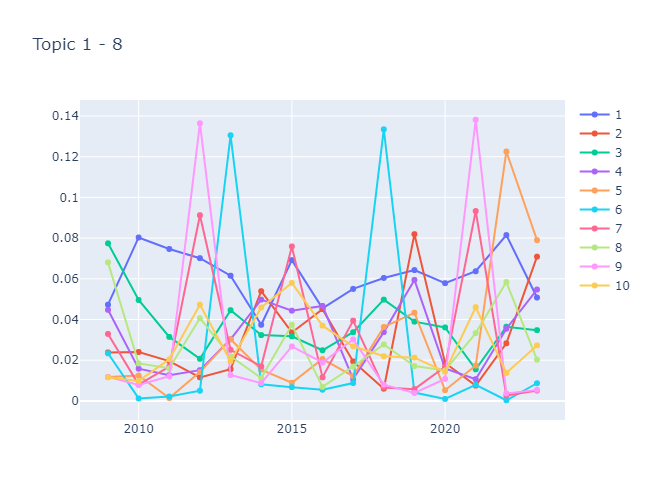

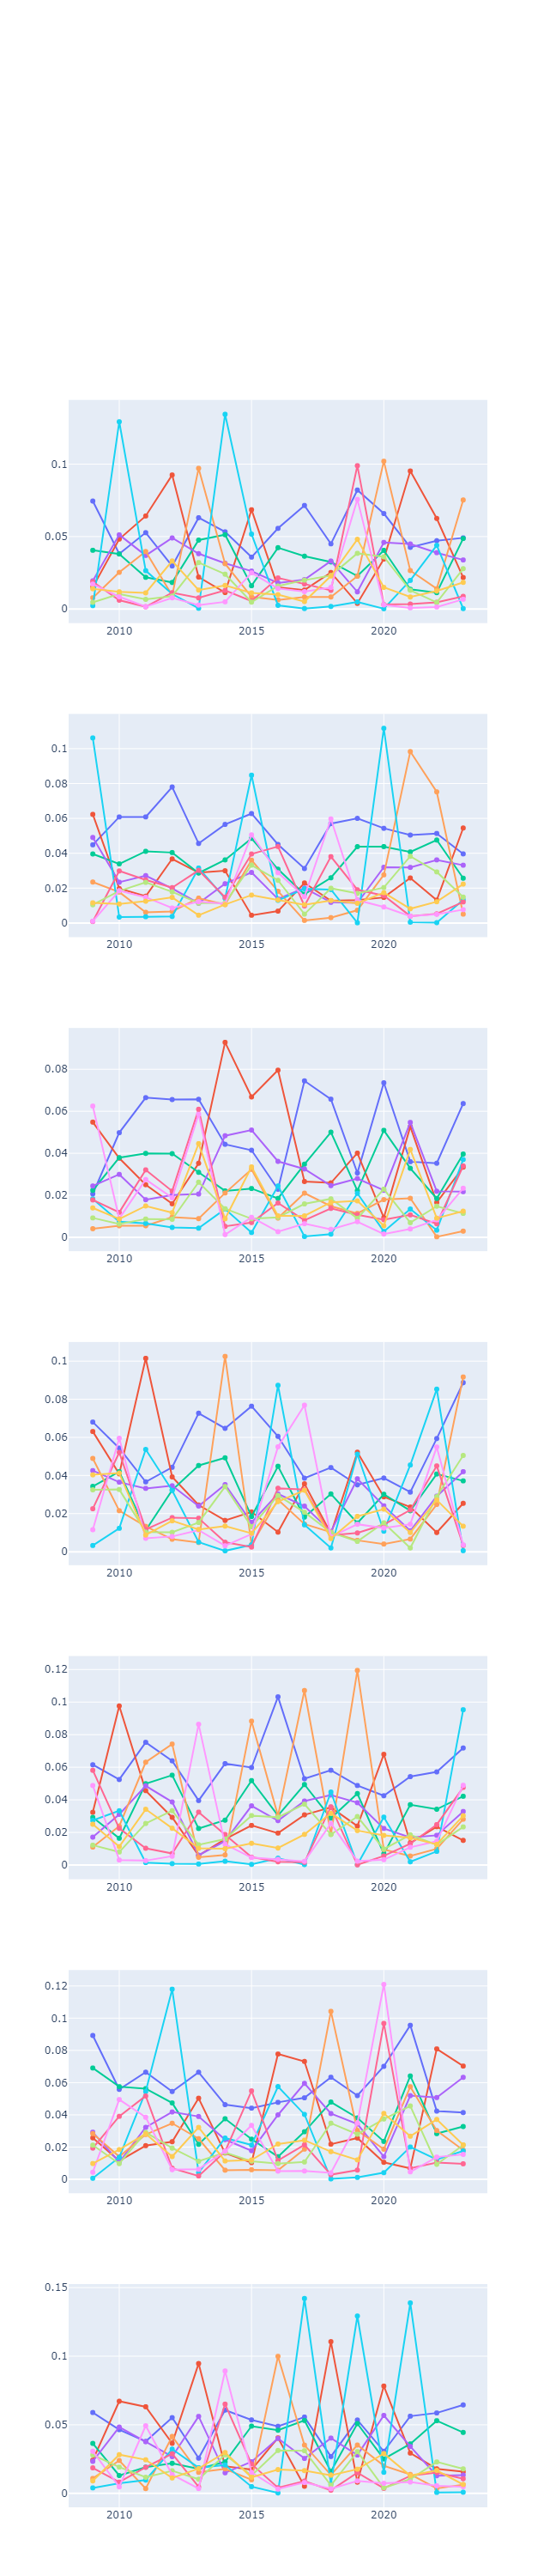

In [ ]:
model_TSED.visualize_semantic(df_topic_semantic_prob_w2v_topk, list_topic_w2v, topic_results_w2v)

## Visualize Coefisien Topic and Cluster Semantic

In [ ]:
coef_model_w2v = model_TSED.evolving_dynamics(topic_results_w2v)

In [ ]:
coef_model_w2v.rename(rename_columns(coef_model_w2v, 1), axis=1, inplace=True)

In [ ]:
coef_model_w2v.index = np.arange(1, len(coef_model_w2v) + 1)

In [ ]:
coef_model_w2v

topic         1         2         3         4         5         6  \
1      1 -0.000115  0.001472 -0.001341  0.000726  0.004498 -0.000795   
2      2  0.000168 -0.000097 -0.000528 -0.000099  0.001574 -0.003230   
3      3 -0.000812 -0.000692 -0.000037  0.000029  0.002466 -0.001437   
4      4  0.000228 -0.001158  0.000195  0.000294  0.000152  0.000562   
5      5 -0.000237 -0.002844 -0.000263 -0.000711  0.000376  0.001588   
6      6 -0.000279 -0.001683  0.000017 -0.000122 -0.000436  0.001879   
7      7 -0.000753  0.002168 -0.001467  0.001879  0.001196 -0.001989   
8      8  0.000441 -0.001594  0.001724 -0.000755 -0.000399  0.003419   

          7         8         9        10  
1 -0.000923 -0.000404  0.000121  0.000199  
2  0.000653  0.001072  0.000310  0.000211  
3 -0.000742  0.000666 -0.000080  0.000328  
4 -0.000763  0.000283 -0.002199  0.000043  
5 -0.000452  0.000042  0.000206 -0.000758  
6 -0.000422  0.000146 -0.000450  0.000076  
7 -0.000557  0.000851  0.000659  0.000916  
8 -0.000903 -0.000255 -0.002031 -0.000369

In [ ]:
coef_model_w2v.to_excel('/content/drive/MyDrive/Upload_Github/extracted data/coefisien_model_w2v.xlsx', index=False)

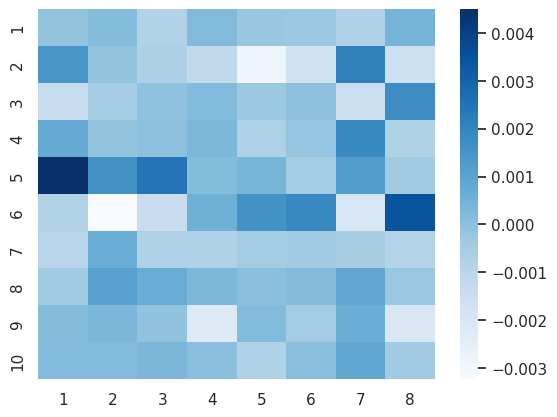

In [ ]:
sns.heatmap(coef_model_w2v.drop(columns='topic').T, annot=False, cmap='Blues');

In [ ]:
x = np.array(coef_model_w2v.columns.values[1:], dtype='float32')
y = np.array(coef_model_w2v.topic.values, dtype='float32')
X, Y = np.meshgrid(x, y)
Z = coef_model_w2v.iloc[:, 1:].values

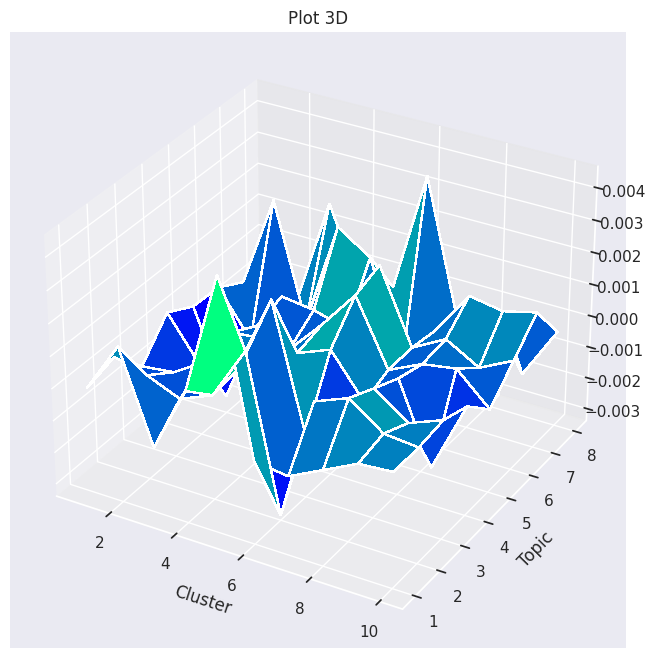

In [ ]:
# membuat plot 3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_title('Plot 3D')
ax.set_xlabel('Cluster')
ax.set_ylabel('Topic')
ax.plot_surface(X, Y, Z, antialiased=False, cmap='winter');

#### interpretation of results : <br>
Topic 1 in word cluster 5, which has the highest trend/upward trend. <br>
Topic 2 in word cluster 6, which has a decreasing trend. <br>

In [ ]:
df_top_words

1              2            3               4            5  \
0       student        student      student            soil      student   
1           low          power        power            life    algorithm   
2    percentage           work        level            bank  performance   
3         score     government       number       financial     analysis   
4         fiber         design       sample           local      control   
5         water       analysis       health      government     analysis   
6        farmer    performance   respondent         company         land   
7        member      character     sampling          social       specie   
8         value            dna      control         society       forest   
9          food       reaction  significant     institution    character   
10          map        process       school         islamic      variety   
11         year       strength  performance        economic   population   
12     analysis           part        group           stock        plant   
13       source           time     sampling           state         soil   
14    condition         primer    technique       political       number   
15       effect       sequence      teacher          market          per   
16      village           film        score           price      village   
17       period        already     hospital          policy    conducted   
18        model          novel     analysis     development         crop   
19         rate      technique       random        resource       family   
20    indonesia       material       factor  implementation    community   
21         loss            his   population          answer       income   
22        micro      determine   difference          income        level   
23       length          level         high            good        among   
24     spectral         income    treatment           right        field   
25       return           work        blood            side    diversity   
26  significant          model       people            full      regency   
27    indicator     respondent      disease          change       factor   
28      balance  questionnaire       stress         economy        yield   
29         seed          error      reading         regency   production   
30        waste         affect        flour         country         west   
31         show        analyze          dry            over         rice   
32      plastic           show         week         attempt         high   
33    component       observed    increased           islam       survey   
34      develop           form        level      indonesian      farming   

               6             7            8  
0        student          acid      student  
1          power         level      islamic  
2           test       control    indonesia  
3         sample          test         risk  
4    correlation        effect      article  
5     respondent   cholesterol      optimal  
6         factor   significant        model  
7       activity      variable        group  
8           mass          body        cycle  
9           test      increase       return  
10         group        design      banking  
11        sample        sample  development  
12      analysis   independent        state  
13       control      analyzed   indonesian  
14      sampling       patient       medium  
15   significant        health    technique  
16         child     treatment      ability  
17        health  introduction     material  
18          case       anxiety     analysis  
19           age    discussion       design  
20       pattern    respondent      english  
21          show       therapy      problem  
22    difference        weight        grade  
23       patient       disease  achievement  
24    instrument  significance      average  
25        sample       elderly     category  
26         score    prevention     

## Entropy

In [ ]:
entropy_model_w2v = model_TSED.get_entropy_topics(topic_results_w2v)

In [ ]:
entropy_model_w2v.rename(rename_columns(entropy_model_w2v, 1), axis=1, inplace=True)
entropy_model_w2v.index = np.arange(1, len(entropy_model_w2v) + 1)

In [ ]:
entropy_model_w2v

year         1         2         3         4         5         6  \
1   2023  1.089161  0.937423  0.816074  0.946942  1.034715  1.309368   
2   2022  1.065456  0.803067  0.882172  0.541678  1.248593  0.790055   
3   2021  1.184062  0.850048  0.925099  0.915341  0.705623  0.696539   
4   2020  0.700724  1.017216  1.069378  0.725580  0.758010  0.750808   
5   2019  1.037607  1.172266  0.703621  0.749883  0.851347  0.956219   
6   2018  1.108536  0.798345  0.886820  0.808075  0.555312  1.132015   
7   2017  0.893776  0.714386  0.611491  0.786145  1.028392  1.002154   
8   2016  0.906921  0.729913  0.857240  0.789272  1.245903  0.827753   
9   2015  1.203323  0.853156  1.234458  0.911257  0.615822  0.964205   
10  2014  0.946655  1.084831  0.793349  0.864204  0.965681  0.687314   
11  2013  1.161358  0.977613  0.800434  1.120542  0.801400  0.728481   
12  2012  1.233271  0.878895  0.835917  0.772587  0.860150  1.026148   
13  2011  0.725866  0.864018  0.811488  0.847995  0.906923  1.088767   
14  2010  0.765426  1.075254  0.842963  0.734742  1.244998  0.952272   
15  2009  1.110088  0.743308  1.026990  0.858375  1.151644  1.062612   

           7         8  
1   1.022241  0.655408  
2   1.022733  0.723293  
3   1.127787  1.033255  
4   1.214708  0.886406  
5   0.902001  1.113591  
6   0.998170  0.749589  
7   1.067018  1.089134  
8   0.933955  1.000446  
9   0.837863  0.788716  
10  0.807629  1.148370  
11  0.861456  0.854134  
12  1.094034  0.983821  
13  1.274175  0.929284  
14  0.937798  0.893974  
15  0.931059  0.860883

In [ ]:
entropy_model_w2v.to_excel('/content/drive/MyDrive/Upload_Github/extracted data/entropy_model_w2v.xlsx', index=False)

## Visualize Entropy Topic

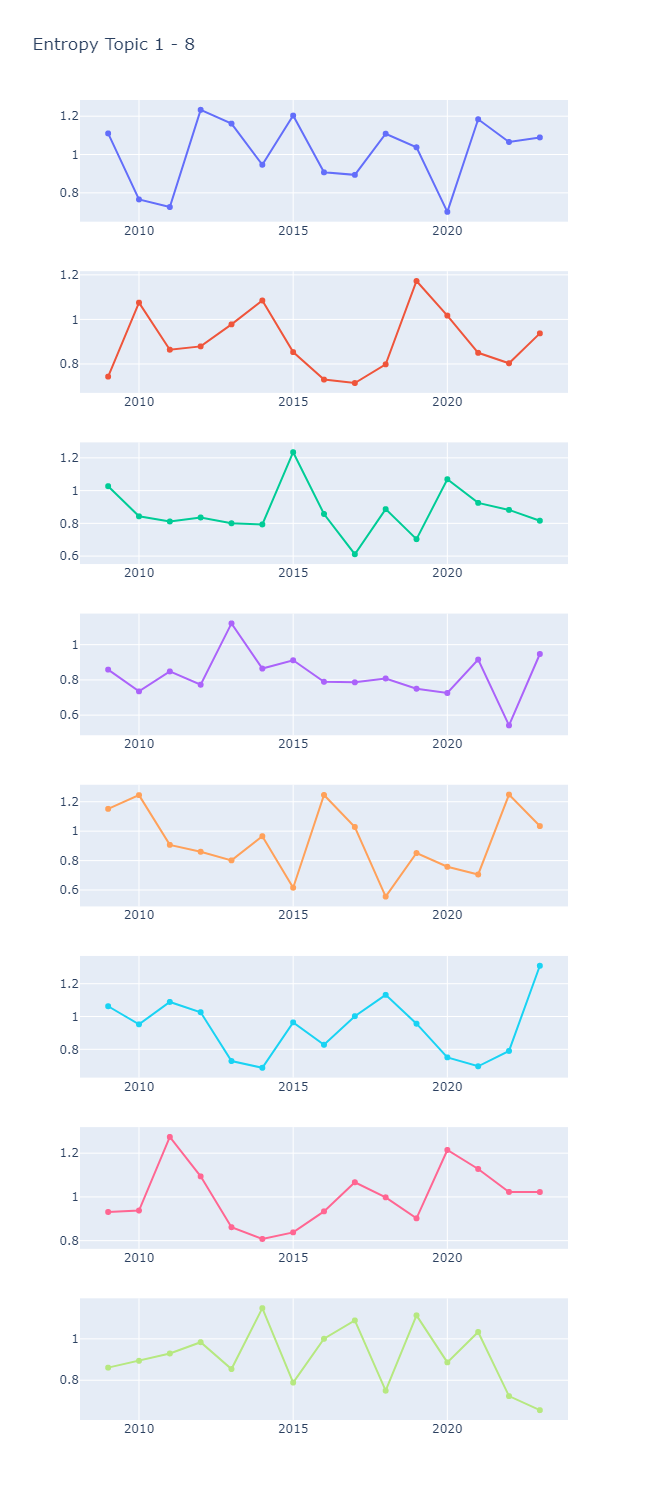

In [ ]:
fig = make_subplots(rows=8, cols=1)
for i, j in enumerate(entropy_model_w2v.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_w2v['year'], y=entropy_model_w2v[j], name=j), row=int(i)+1, col=1).update_layout(
            autosize=False, width=700, height=1500, showlegend=False, title='Entropy Topic 1 - 8'
        )

fig.show()

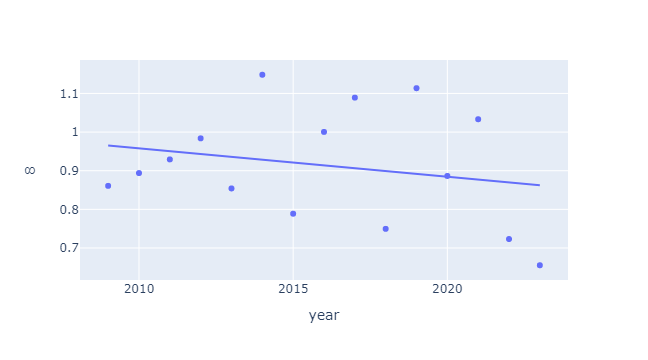

In [ ]:
px.scatter(entropy_model_w2v, x='year', y=8, trendline='ols')

#### Interpretation
Example interpretation and visualization, final interpretation in the paper. <br>
Topic 1 upward trends <br>
Topic 2 stagnan trends <br>
Topic 3 downtrend <br>
Topic 4 downtrend <br>
Topic 5 downtrend <br>
Topic 6 downtrend <br>
Topic 7 upward trends <br>
Topic 8 downtrend <br>

In [ ]:
naik = entropy_model_w2v[['year', 1, 7]]
stagnan = entropy_model_w2v[['year', 2]]
turun = entropy_model_w2v[['year', 3, 4, 5, 6, 8]]

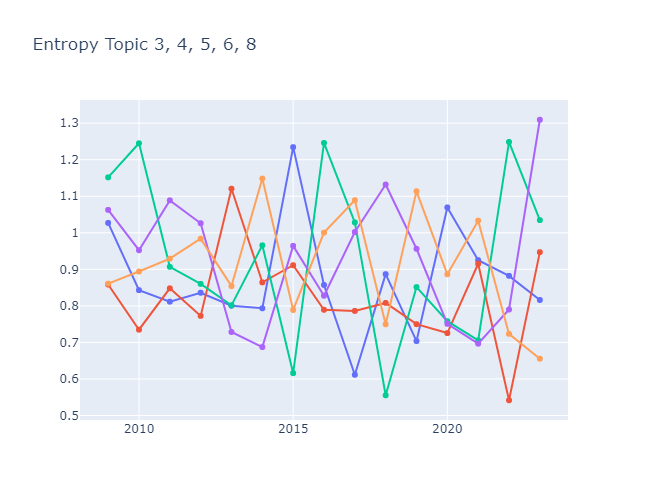

In [ ]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(turun.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_w2v['year'], y=entropy_model_w2v[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 3, 4, 5, 6, 8'
        )

fig.show()

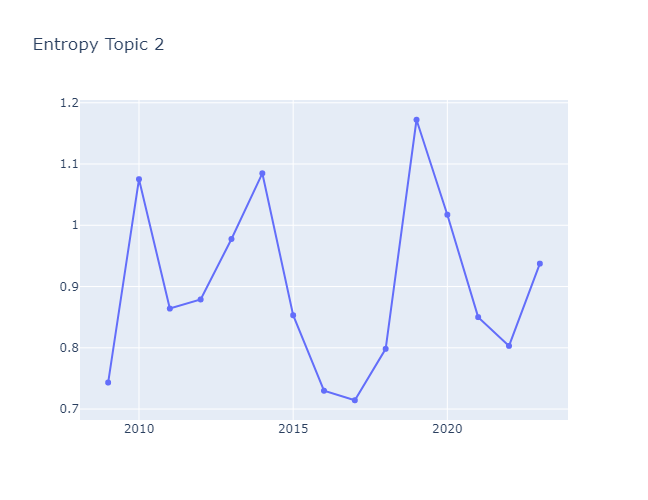

In [ ]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(stagnan.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_w2v['year'], y=entropy_model_w2v[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 2'
        )

fig.show()

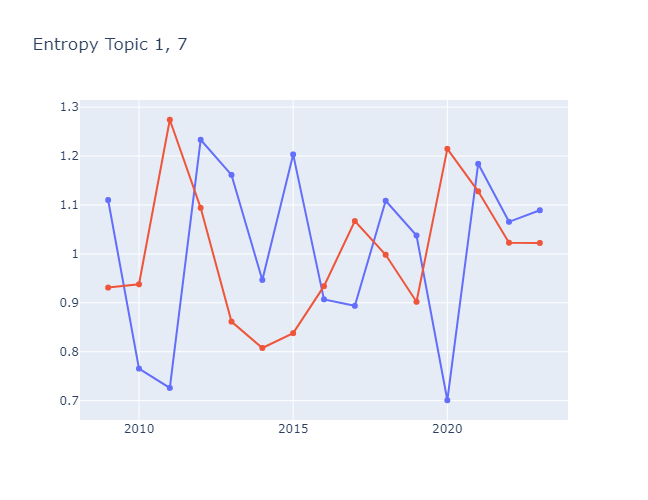

In [ ]:
fig = make_subplots(rows=1, cols=1)
for i, j in enumerate(naik.columns[1:]):
    fig.add_trace(go.Scatter(x=entropy_model_w2v['year'], y=entropy_model_w2v[j], name=j), row=1, col=1).update_layout(
            autosize=False, width=500, height=500, showlegend=False, title='Entropy Topic 1, 7'
        )

fig.show()

## Visualize Intensity Topic

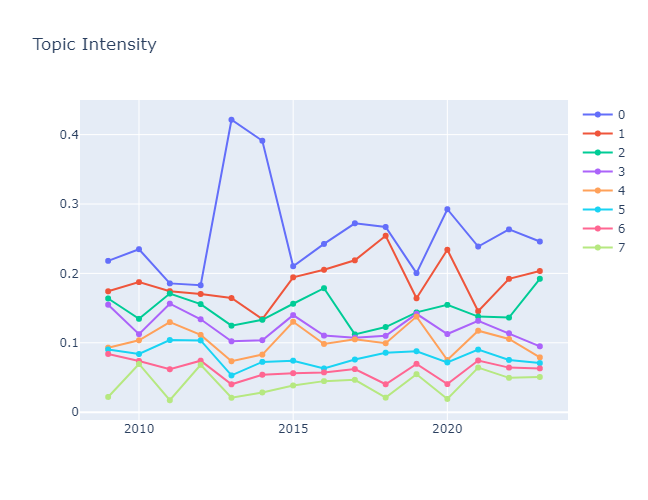

In [ ]:
fig = make_subplots(rows=1, cols=1)
for h in df_intensity.columns[1:]:
    fig.add_trace(go.Line(x=df_intensity['year'], y=df_intensity[h], name=h), row=1, col=1).update_layout(
        autosize=False, width=650, height=500, showlegend=True, title='Topic Intensity'
    )
fig.show()